In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from scipy.interpolate import griddata
from scipy.integrate import simps
import pandas as pd
from multiprocessing import Pool
import itertools as it

# Loading and Combining Interpolated Fields
For taking fields from Comsole and combining them

In [2]:
# Load the fields individually
thz052 = np.load('f=0.52THz_interp.npz')
thz063 = np.load('f=0.63THz_interp.npz')
thz072 = np.load('f=0.72THz_interp.npz')
thz082 = np.load('f=0.82THz_interp.npz')

In [3]:
full_field = {'Ex': np.real(thz052['Ex'] + thz063['Ex'] + thz072['Ex'] + thz082['Ex']),
             'Ey': np.real(thz052['Ey'] + thz063['Ey'] + thz072['Ey'] + thz082['Ey'])}

x = thz063['X']
y = thz052['Y']
extent=(min(x), max(x), min(y), max(y))

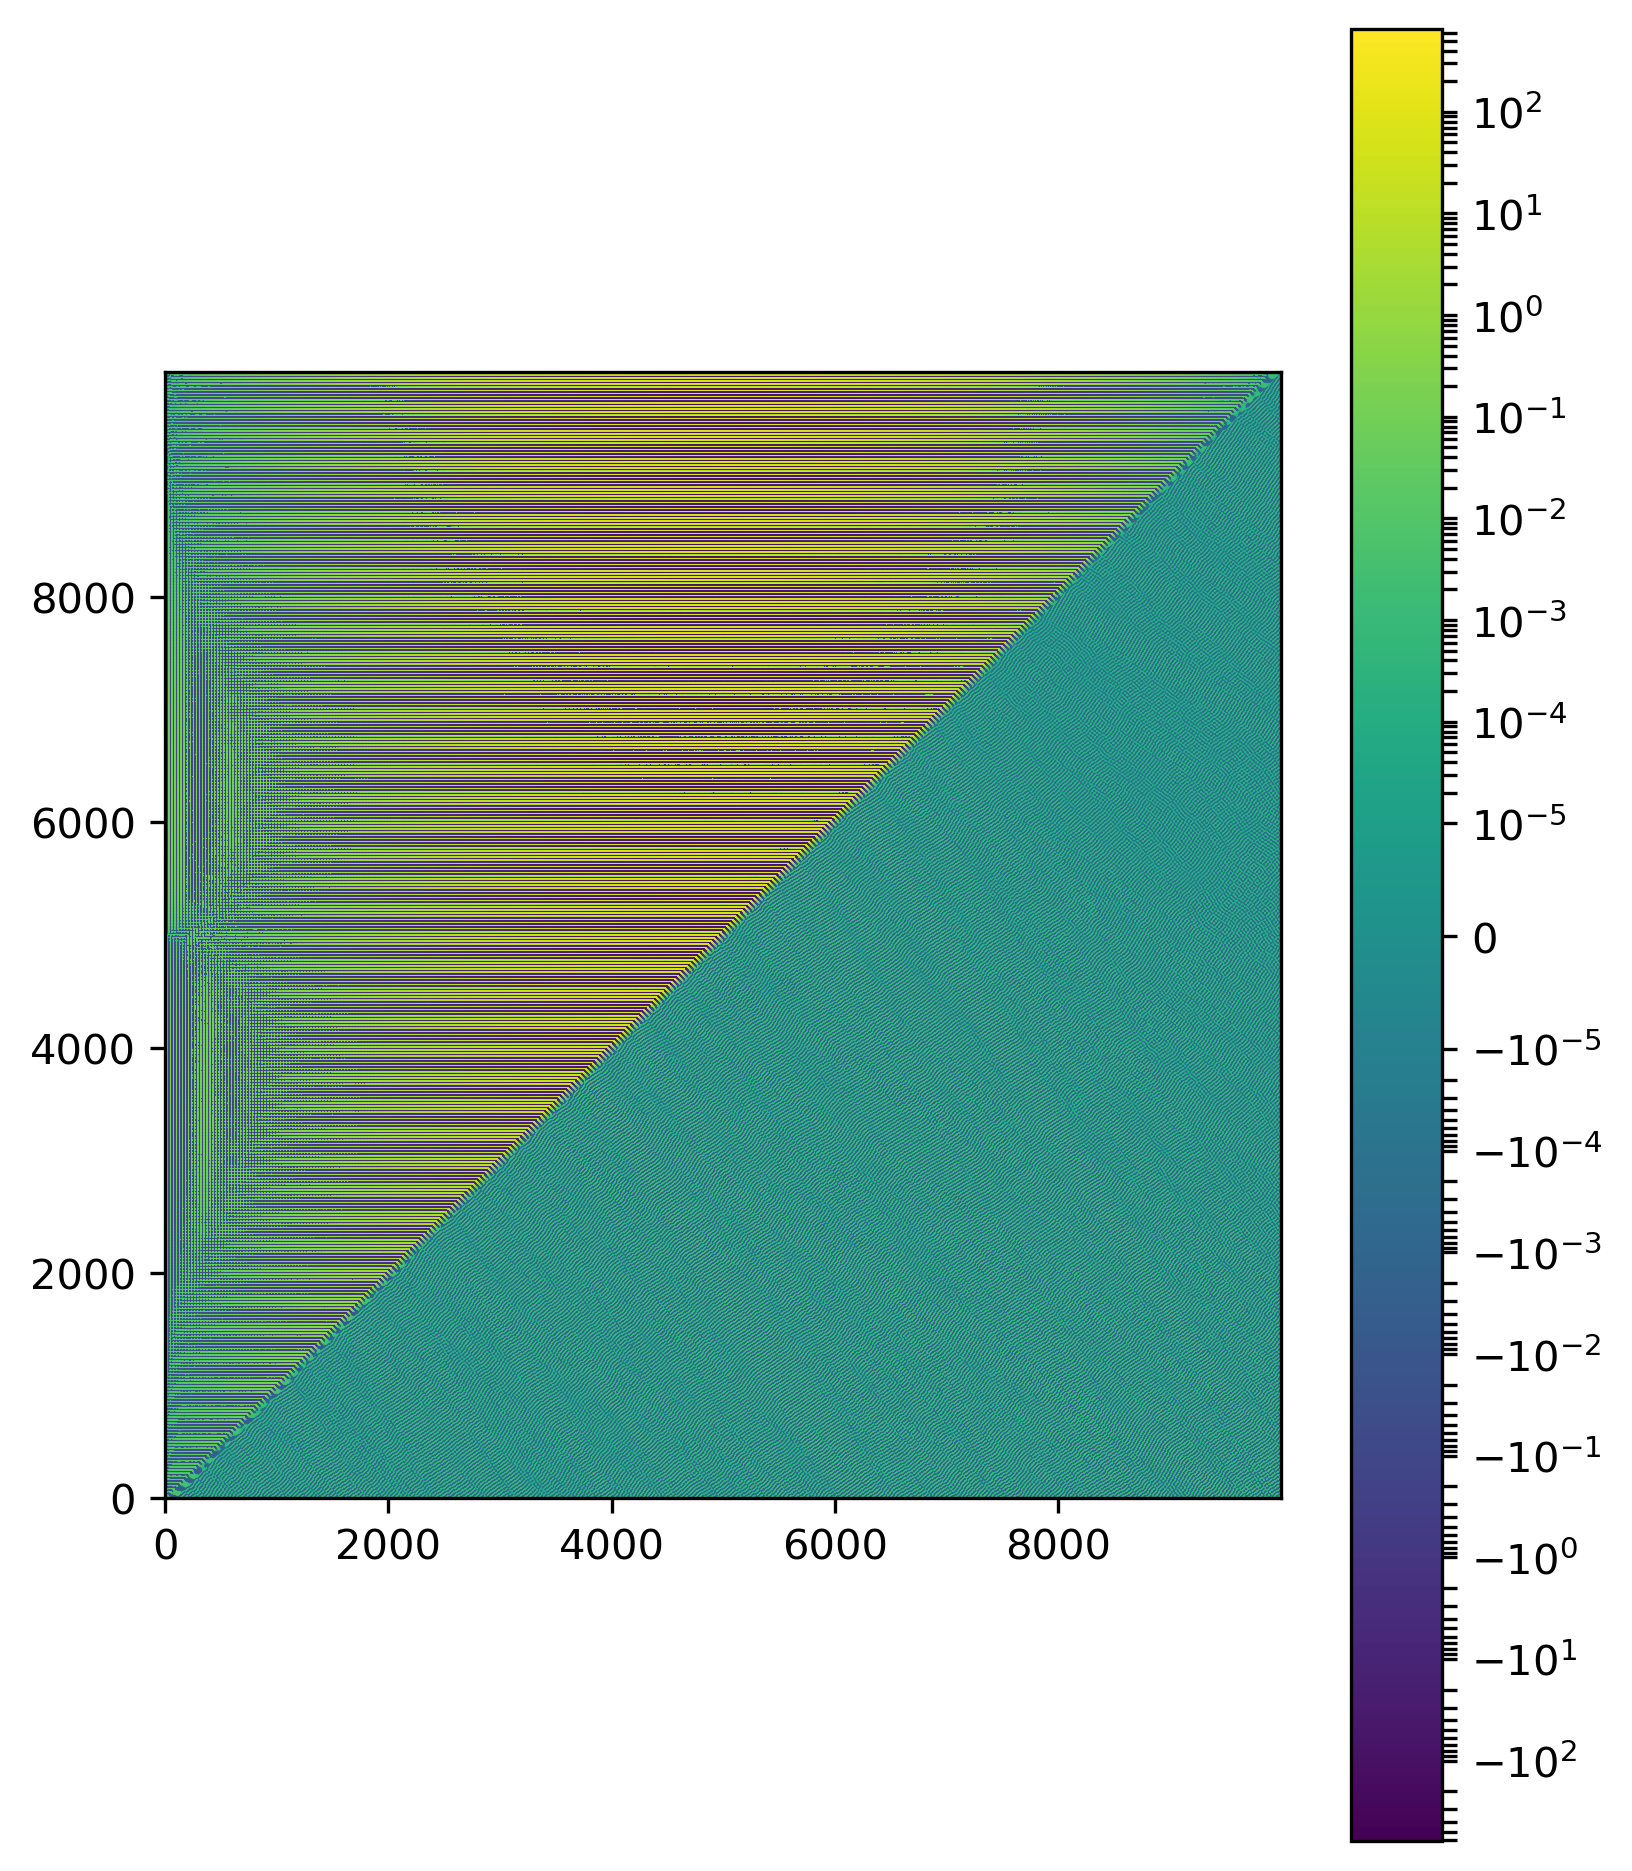

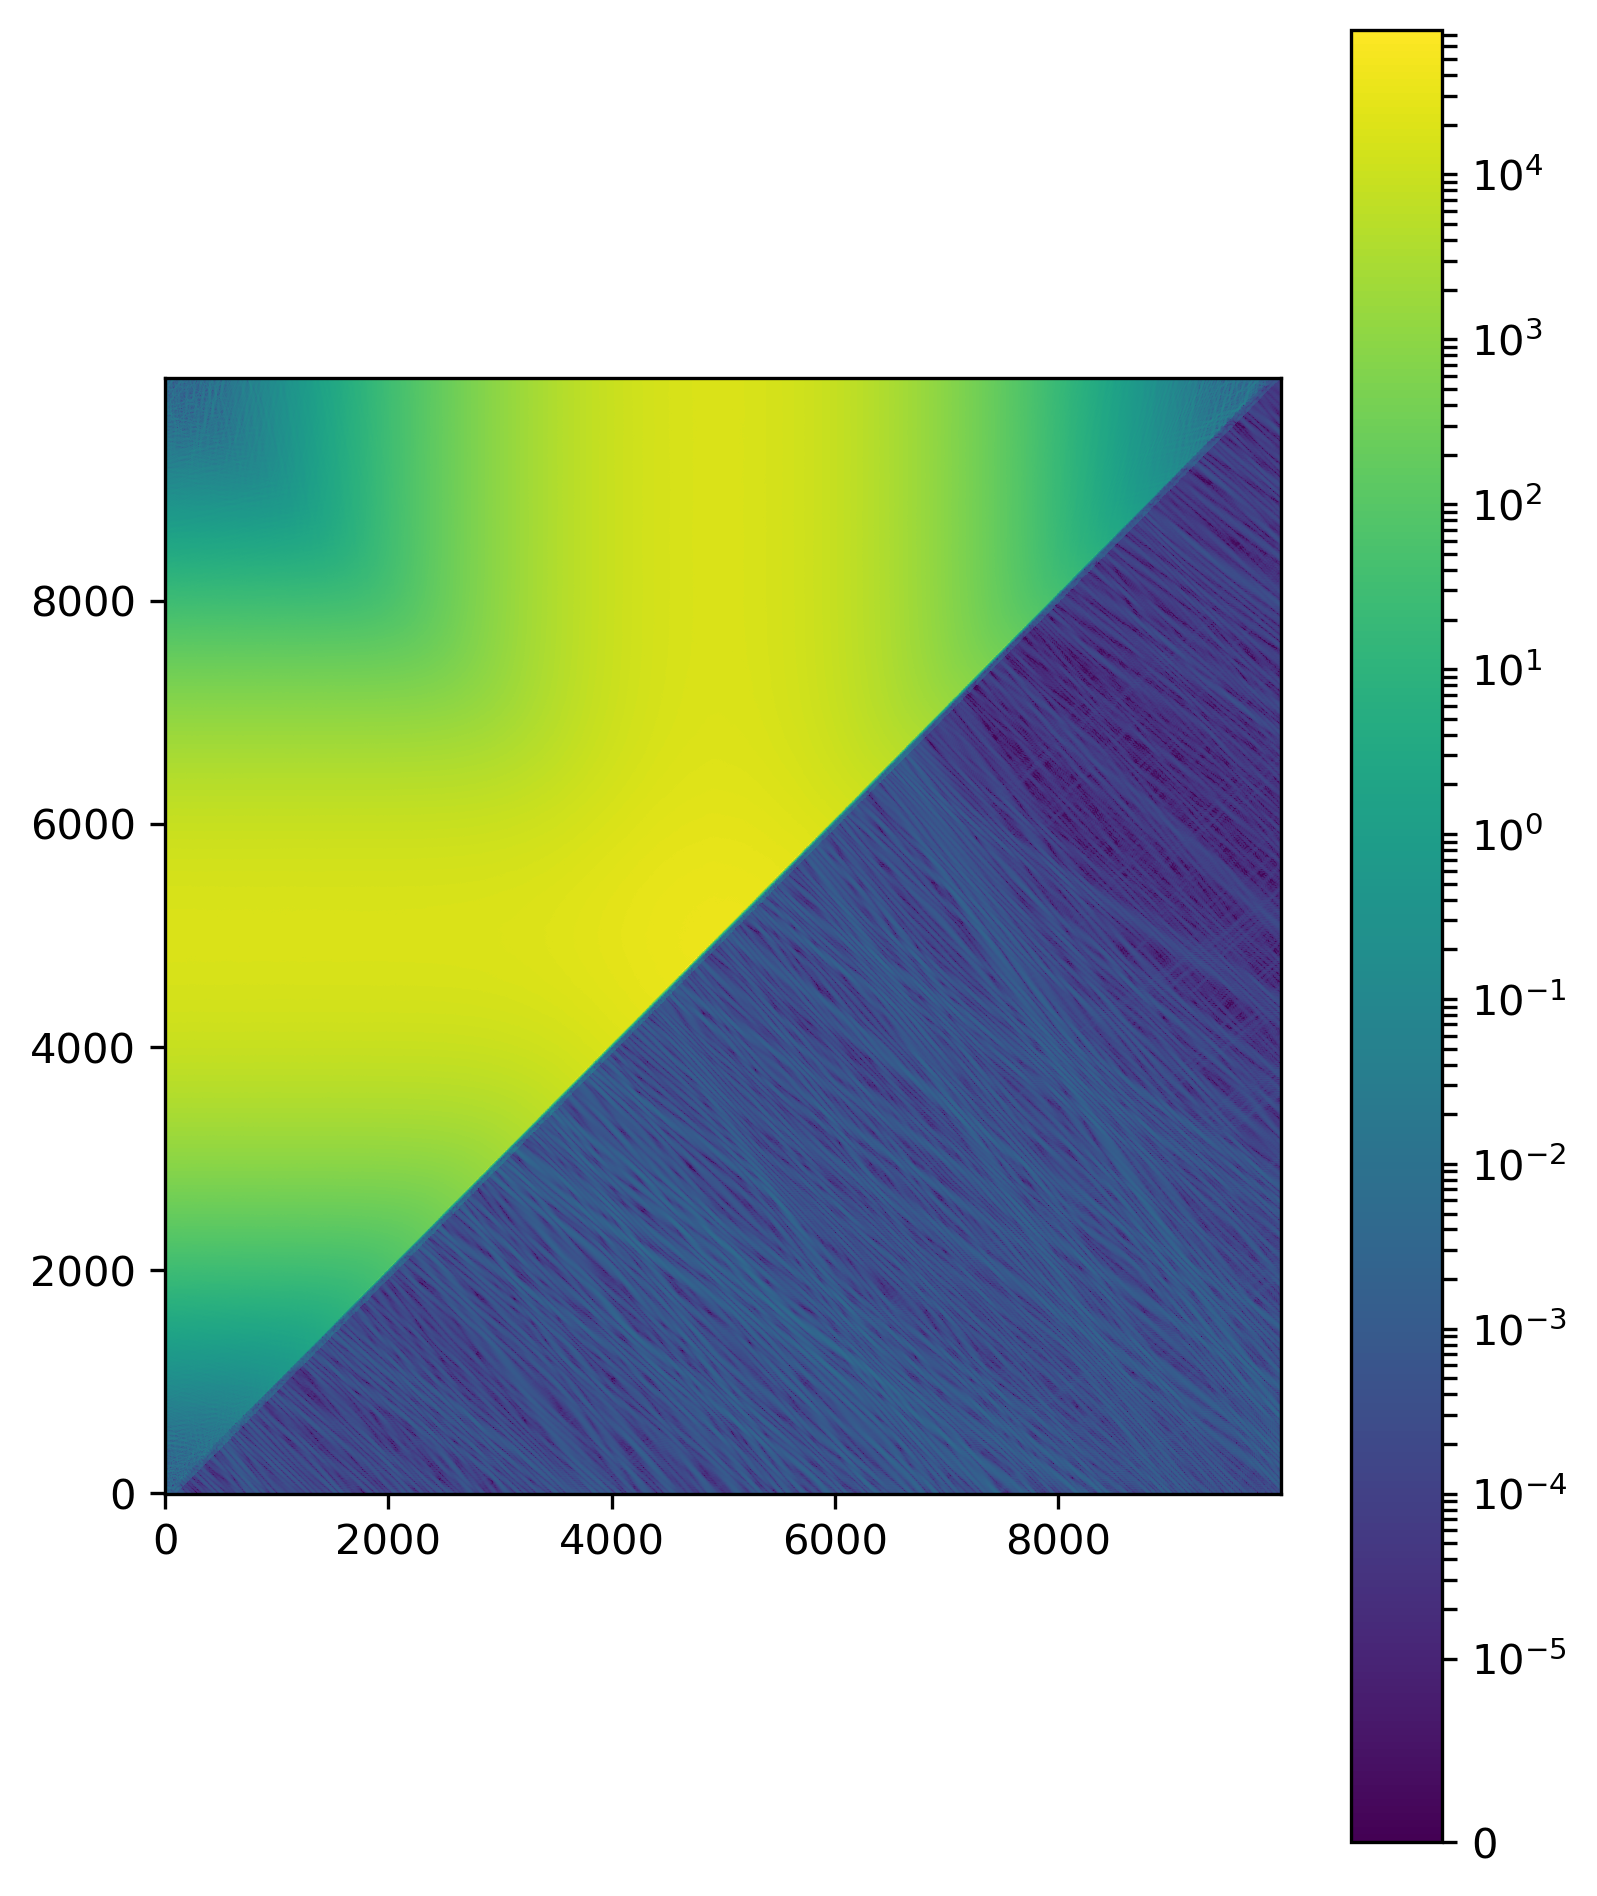

In [45]:
plt.figure(figsize=(6,8), dpi=300)
plt.imshow(np.abs(thz082['Ex']) ** 2 + np.abs(thz082['Ey']) ** 2, 
           interpolation='nearest',
           origin='lower',
           norm=SymLogNorm(linthresh=1e-5)
          )
plt.colorbar()

In [34]:
def get_I(E1, E2, φ):
    
    Ex = E1['Ex'] + np.exp(1j* φ) * E2['Ex']
    Ey = E1['Ey'] + np.exp(1j* φ) * E2['Ey']
    
    return np.abs(Ex) ** 2 + np.abs(Ey) ** 2
    
def phase_scan(E1, E2, φ):
    
    I = get_I(E1, E2, φ)
    
    I_out = simps(I[:, -1])
    
    return I_out / simps(I[:, 0]), I_out


In [20]:
phase = np.linspace(0, 2 * np.pi, 10)

results = [phase_scan(thz052, thz063, ϕ) for ϕ in phase]

In [22]:
transmittance, I_out = zip(*results)

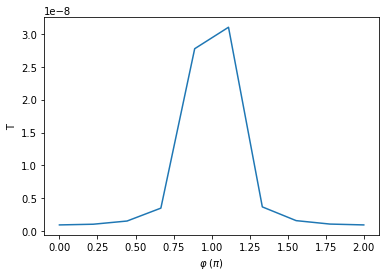

In [26]:
plt.plot(phase / np.pi, transmittance)
plt.xlabel(r"$\varphi$ ($\pi$)")
plt.ylabel(r"Transmittance")
plt.show()

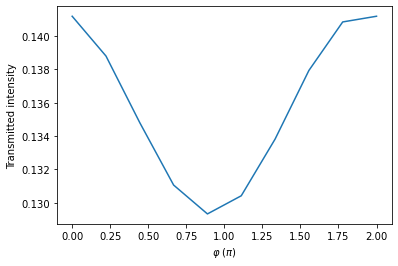

In [27]:
plt.plot(phase / np.pi, I_out)
plt.xlabel(r"$\varphi$ ($\pi$)")
plt.ylabel(r"Transmitted intensity")
plt.show()

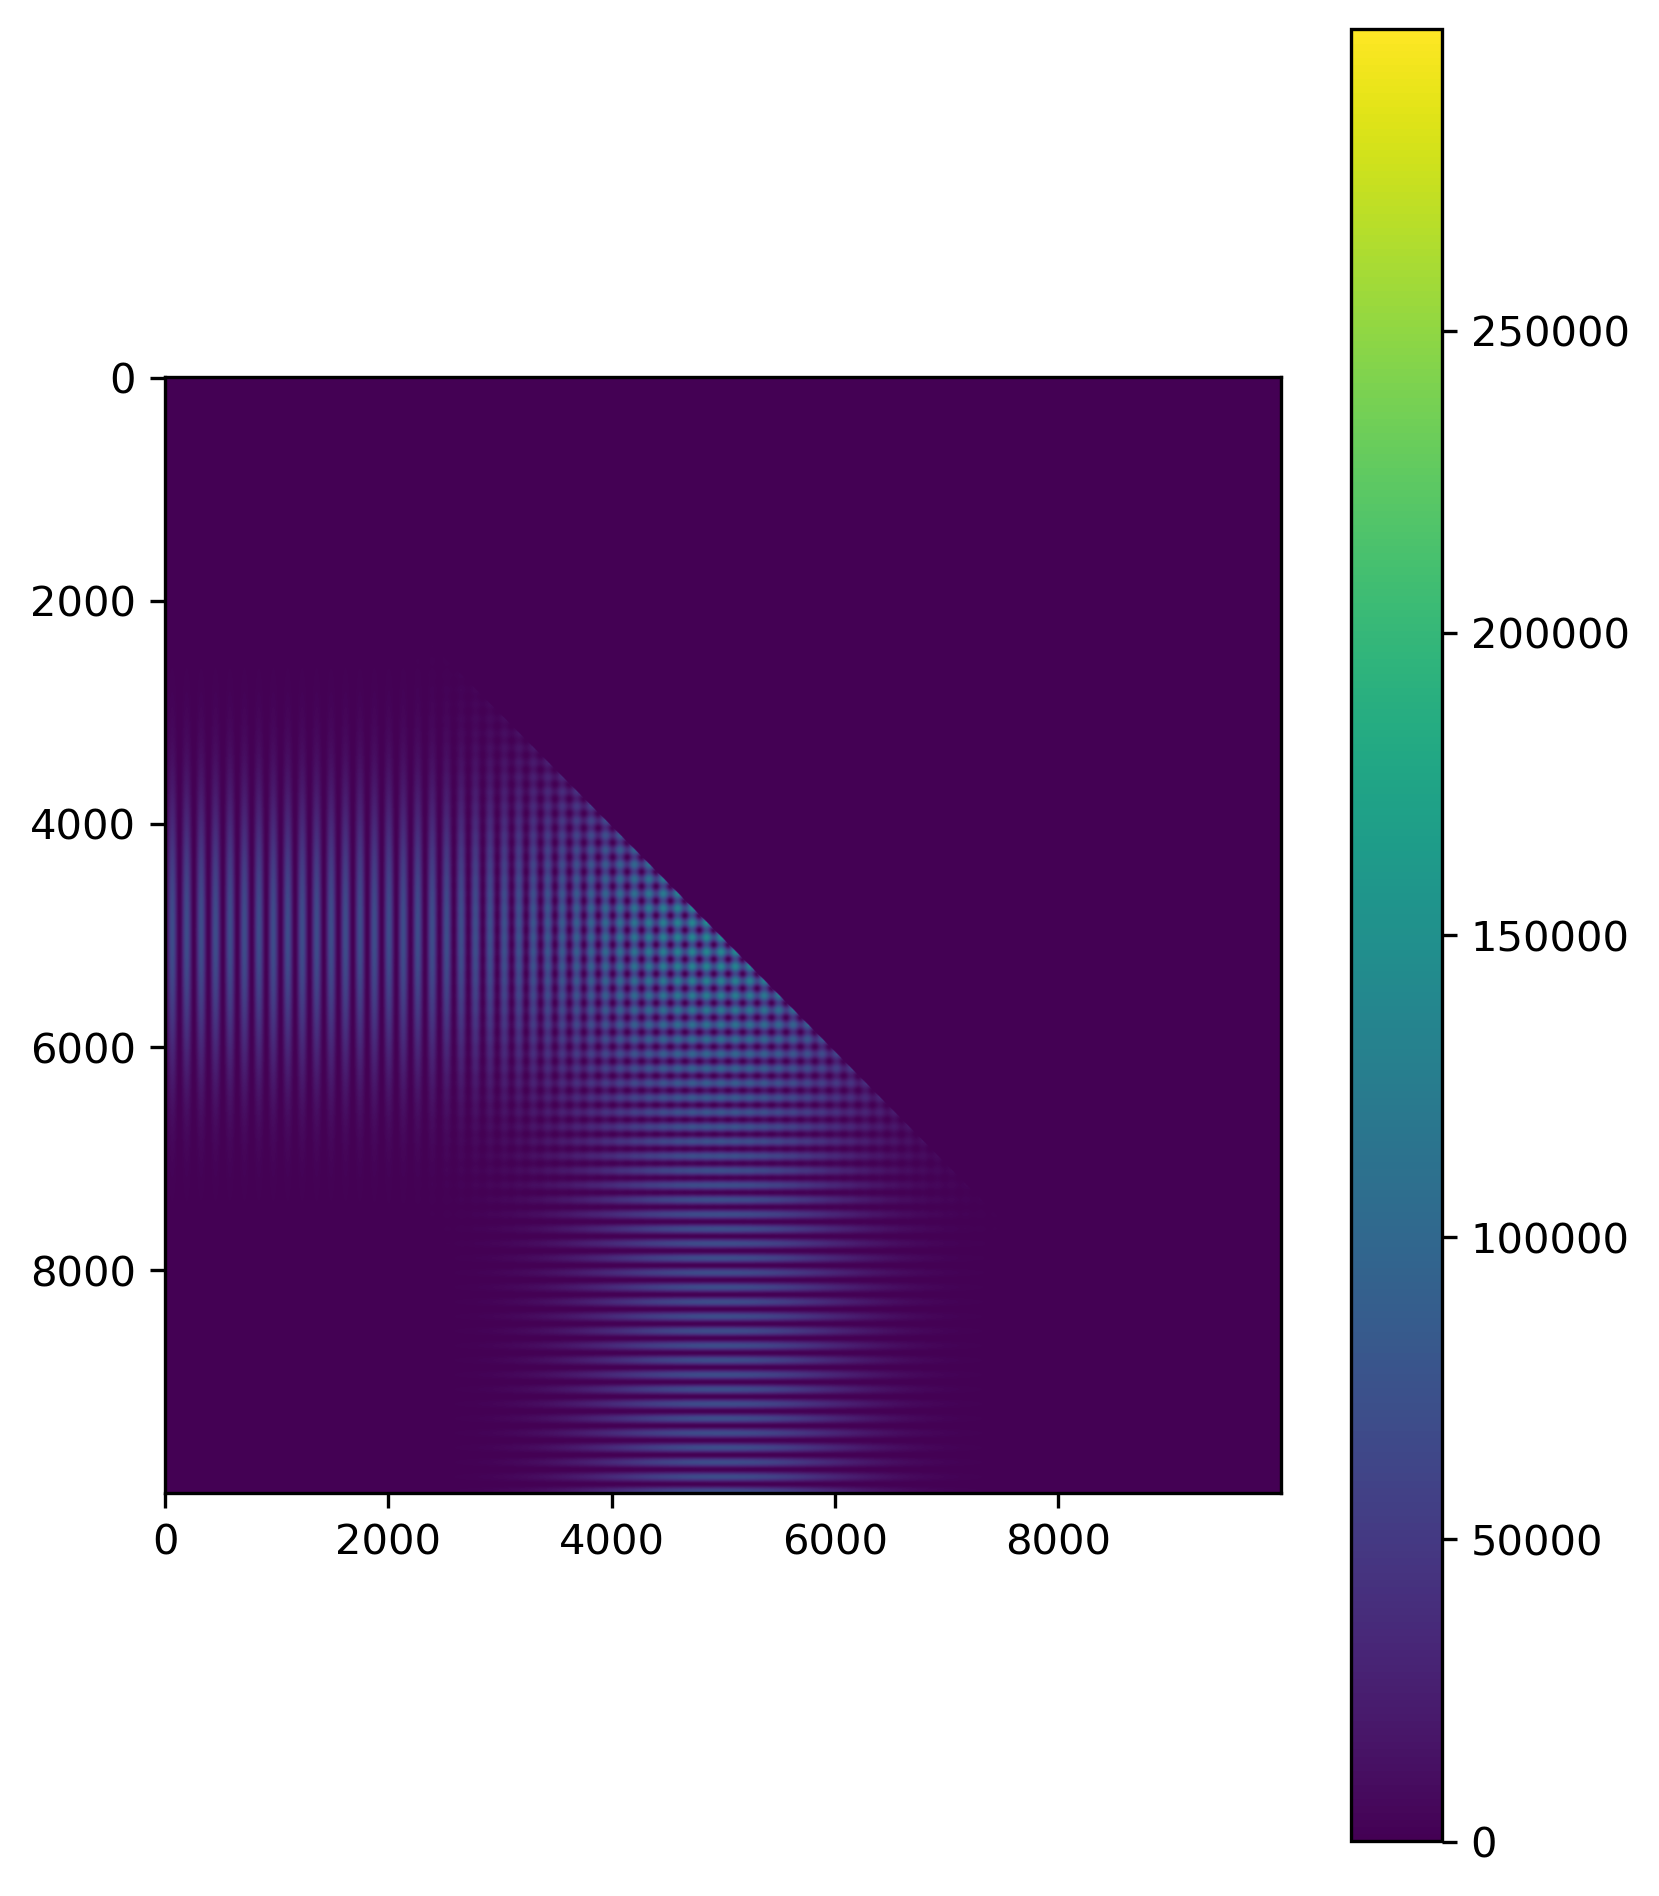

In [37]:
plt.figure(figsize=(6,8), dpi=300)
plt.imshow(get_I(thz052, thz063, np.pi))
plt.colorbar()
plt.show()

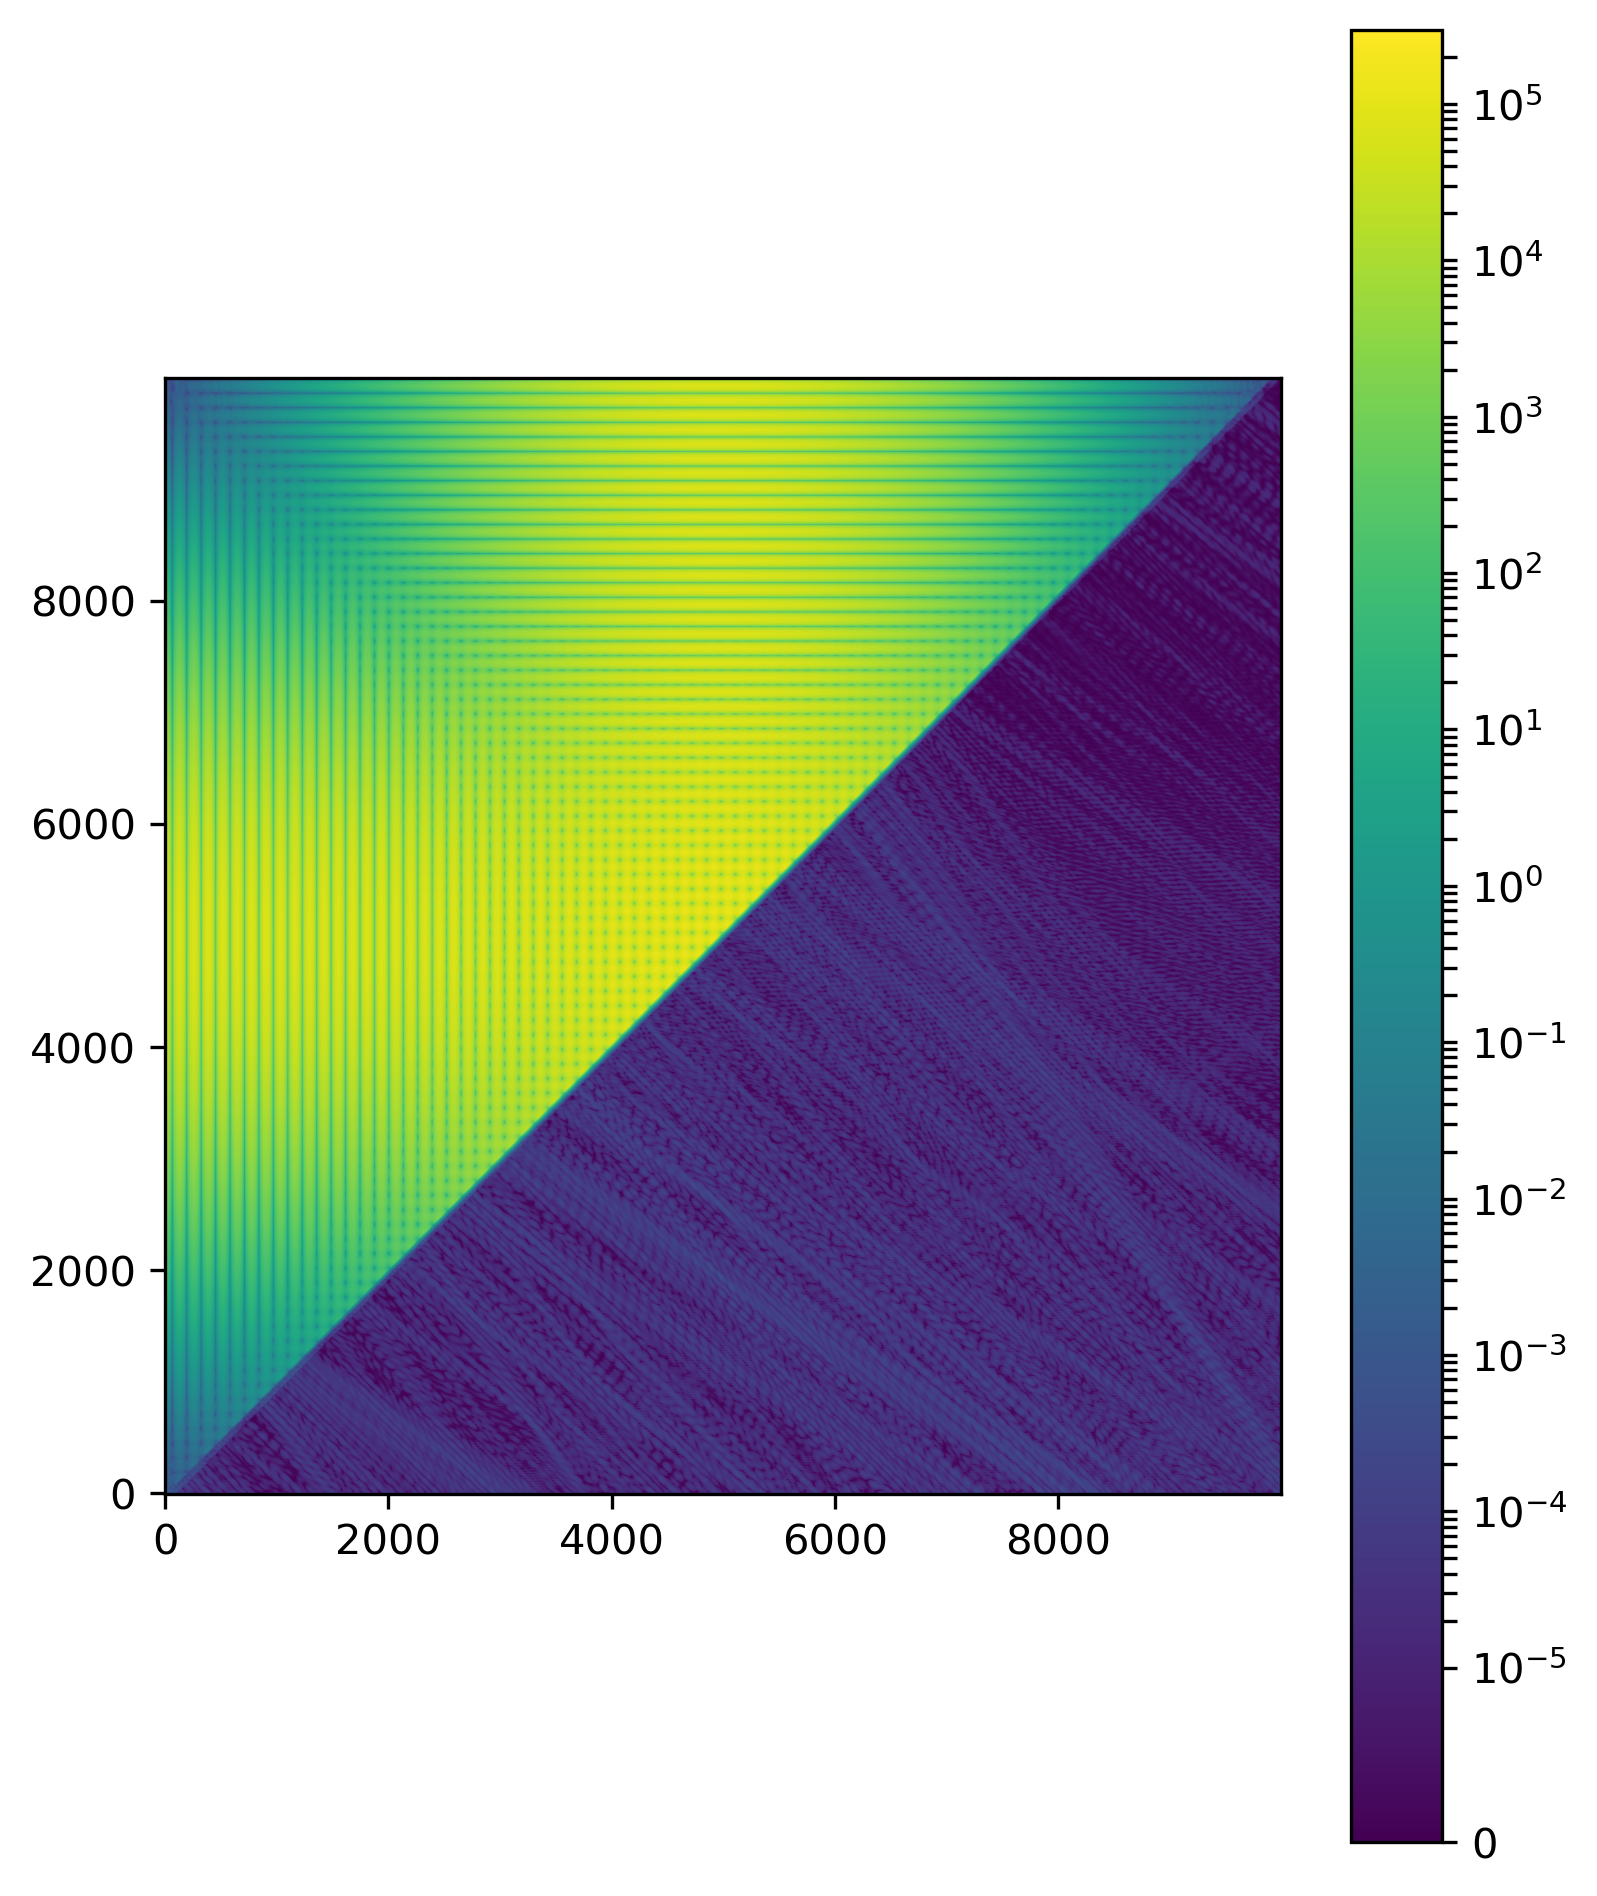

In [41]:
plt.figure(figsize=(6,8), dpi=300)
plt.imshow(get_I(thz052, thz063, 0),
           origin='lower',
           norm=SymLogNorm(linthresh=1e-5))
plt.colorbar()
plt.show()